# Effect of AI on Customer Churn 

In [51]:
import pandas as pd
from sklearn.svm import SVC
from ISLP import confusion_table
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from matplotlib.pyplot import subplots
from sklearn.metrics import RocCurveDisplay
roc_curve = RocCurveDisplay.from_estimator
import matplotlib.pyplot as plt
from ISLP.svm import plot as plot_svm
import numpy as np
import sklearn.model_selection as skm

## Read dataset and select predictors

In [8]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
cols = ['Satisfaction_with_AI_Services', 'AI_Personalization_Effectiveness', 'AI_Response_Time', 
        'Overall_Usage_Frequency', 'Customer_Service_Interactions', 'Change_in_Usage_Patterns', 'Customer_Churn']
training = train[cols]
testing = test[cols]


x_train = training.drop(['Customer_Churn'], axis=1)
y_train = training['Customer_Churn']
x_test = testing.drop(['Customer_Churn'], axis=1)
y_test = testing['Customer_Churn']


## Select model & variable: Support Vector Machines
Since the target variable `Customer_Churn` only has two outcomes (0 or 1), we decide to approach it using classification method. The first step we take is to generate a correlation table for all of the variables to pick. 

In [39]:
train.corr()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
ID,1.000000,-0.003650,0.001213,-0.026875,-0.021246,-0.015012,-0.004322,0.009345,-0.006244,-0.019766
Age,-0.003650,1.000000,-0.794600,0.005429,0.009565,-0.010322,-0.005757,-0.012153,-0.002563,0.109484
AI_Interaction_Level,0.001213,-0.794600,1.000000,-0.016912,-0.018981,0.010988,0.006177,0.002196,0.001754,-0.153978
Satisfaction_with_AI_Services,-0.026875,0.005429,-0.016912,1.000000,0.963572,0.002311,0.006076,0.015270,-0.026991,-0.103294
AI_Personalization_Effectiveness,-0.021246,0.009565,-0.018981,0.963572,1.000000,0.002159,0.003300,0.013180,-0.024739,-0.098060
AI_Response_Time,-0.015012,-0.010322,0.010988,0.002311,0.002159,1.000000,-0.019246,0.017841,0.013044,-0.016676
Overall_Usage_Frequency,-0.004322,-0.005757,0.006177,0.006076,0.003300,-0.019246,1.000000,0.007322,-0.017665,-0.019843
Customer_Service_Interactions,0.009345,-0.012153,0.002196,0.015270,0.013180,0.017841,0.007322,1.000000,0.006894,0.003646
Change_in_Usage_Patterns,-0.006244,-0.002563,0.001754,-0.026991,-0.024739,0.013044,-0.017665,0.006894,1.000000,0.027809
Customer_Churn,-0.019766,0.109484,-0.153978,-0.103294,-0.098060,-0.016676,-0.019843,0.003646,0.027809,1.000000


The top three variable are `Age`, `AI_Interaction_Level`, `Satisfaction_with_AI_Services`, we now do the visualization

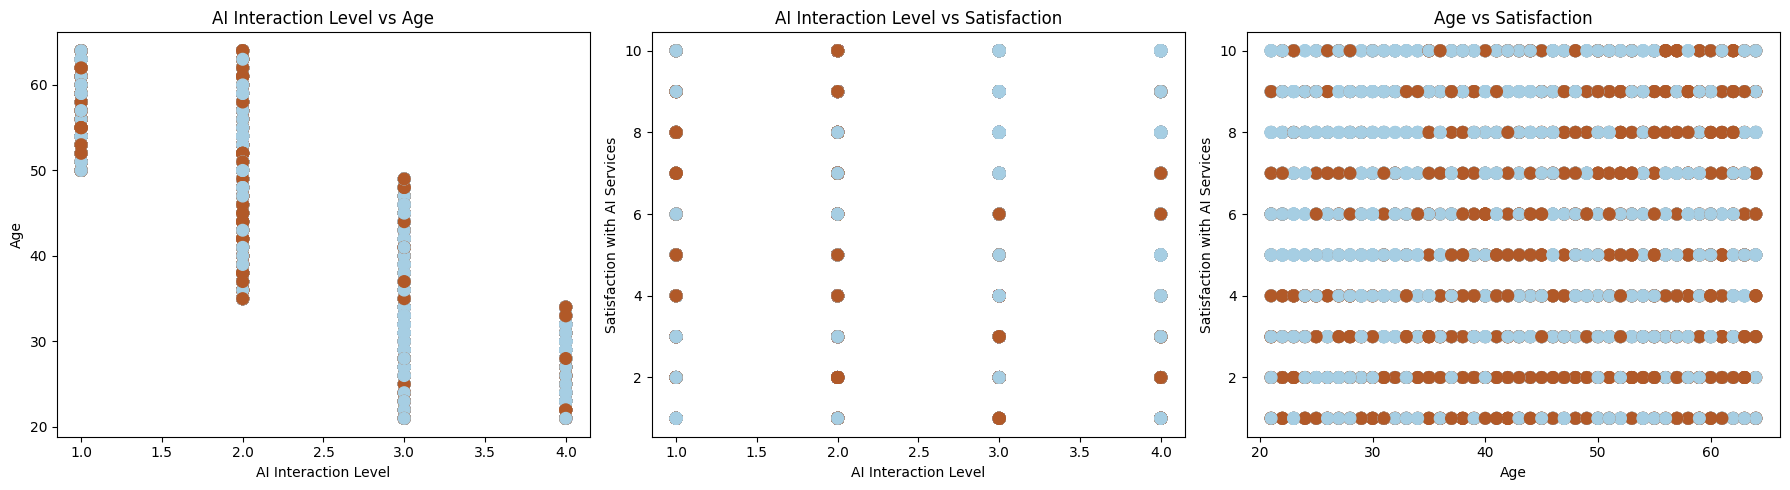

In [43]:
x1 = train[["AI_Interaction_Level", "Age"]]
x2 = train[["AI_Interaction_Level", "Satisfaction_with_AI_Services"]]
x3 = train[["Age", "Satisfaction_with_AI_Services"]]
y = train["Customer_Churn"]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))


axes[0].scatter(x1.iloc[:, 0], x1.iloc[:, 1], s=70, c=y, cmap=plt.cm.Paired)
axes[0].set_xlabel('AI Interaction Level')
axes[0].set_ylabel('Age')
axes[0].set_title('AI Interaction Level vs Age')


axes[1].scatter(x2.iloc[:, 0], x2.iloc[:, 1], s=70, c=y, cmap=plt.cm.Paired)
axes[1].set_xlabel('AI Interaction Level')
axes[1].set_ylabel('Satisfaction with AI Services')
axes[1].set_title('AI Interaction Level vs Satisfaction')

axes[2].scatter(x3.iloc[:, 0], x3.iloc[:, 1], s=70, c=y, cmap=plt.cm.Paired)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Satisfaction with AI Services')
axes[2].set_title('Age vs Satisfaction')


plt.tight_layout()
plt.show()


The two classes seem not to be separable by a hyperplane. Given this feature, we decide to use Support Vector Classifiers (SVC), which is known as the generalization of the maximal margin classifier to the non-separable case. The maximal margin classifer is a the hyperplane with the maximum margin. For training variables, after few rounds of testing, we find out that the combination of `Satisfaction_with_AI_Services`, `AI_Personalization_Effectiveness`, `AI_Response_Time`, `Overall_Usage_Frequency`, `Customer_Service_Interactions`, and `Change_in_Usage_Patterns` yields the best prediction along with a radial kernel for SVC.



In [53]:
model = SVC(kernel="rbf",gamma=0.5,C=0.1)
model .fit(x_train,y_train)
pred = rbf.predict(x_test)
confusion_table(pred,y_test)


Truth,0,1
Predicted,,
0,680,232
1,34,304


In [54]:
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 78.72%


### Tuning the model
We use the `GridSearchCV` to tune the hyperparameters 

In [52]:
kfold  =  skm. KFold (5,random_state =0, shuffle =True)
grid   =  skm. GridSearchCV (rbf,{ 'C':[0.1 ,1 ,10 ,100 ,1000] , 'gamma':[0.5 ,1 ,2 ,3 ,4]} ,refit =True , cv = kfold ,scoring ='accuracy')
grid.fit( x_train ,   y_train) 
grid. best_params_

{'C': 0.1, 'gamma': 0.5}

### ROC visualization
Here are the ROC curves on training and testing data

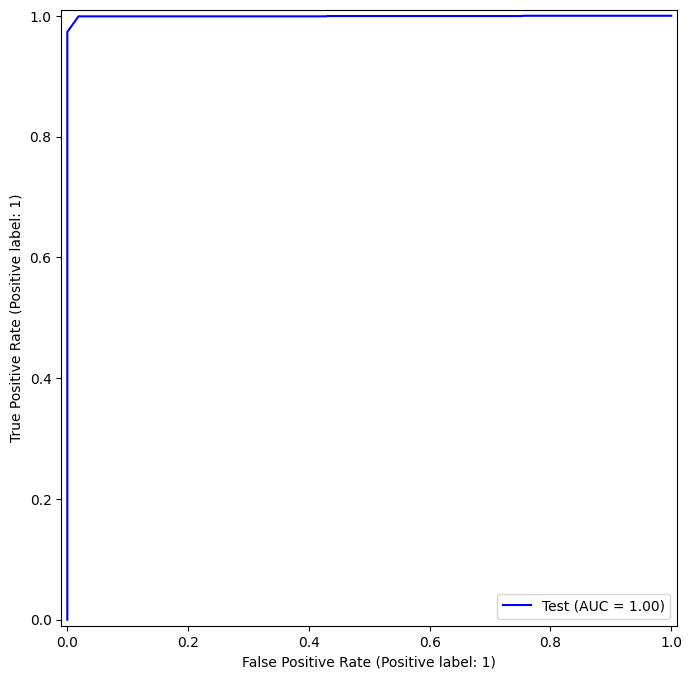

In [59]:
fix, ax = subplots(figsize=(8,8))
roc_curve(rbf,x_train,y_train,name="Test",color="b",ax=ax)

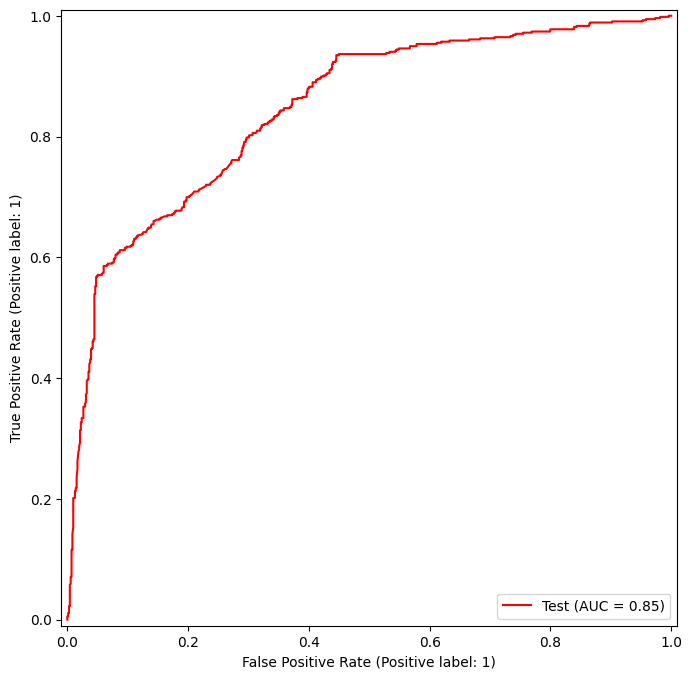

In [48]:
fix, ax = subplots(figsize=(8,8))
roc_curve(rbf,x_test,y_test,name="Test",color="r",ax=ax)

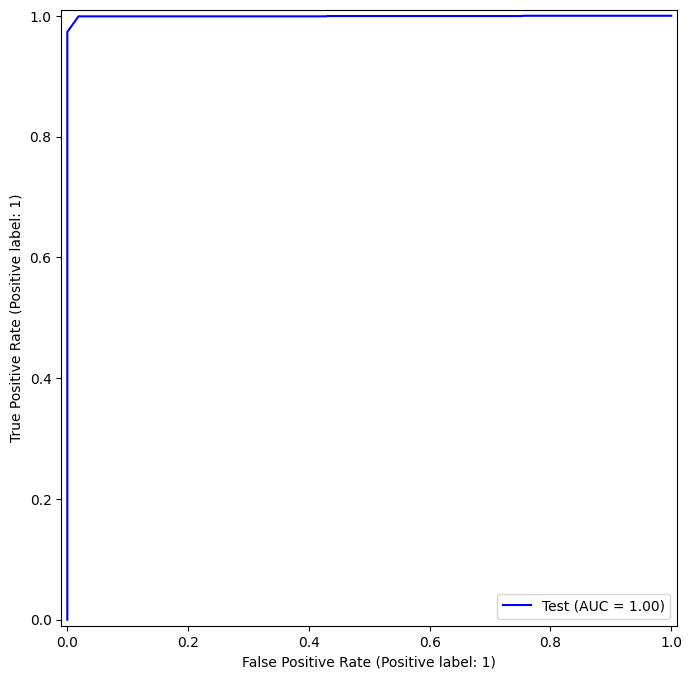